In [59]:
import numpy as np
import f21_predict_base as base
import F21DataLoader as dl
import F21Stats as f21stats
import matplotlib.pyplot as plt
import importlib


importlib.reload(base)
importlib.reload(dl)
importlib.reload(f21stats)

<module 'F21Stats' from '/Users/meghapatil/Documents/Sameer/Physics/girish-kulkarni/Code/21cm-forest/code/F21Stats.py'>

In [60]:
def load_dataset(datafiles, psbatchsize=10, ps_bins=None, limitsamplesize=None):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=False, ps_bins=None, limitsamplesize=limitsamplesize, scale_ps=True)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    all_ps = results['ps']
    all_params = results['params']
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    print(f"\nCombined data shape: {all_los.shape}")
    print(f"Combined parameters shape: {all_params.shape}")
    return (all_params, all_freq, all_los, all_ps, all_ks)

def plot(ps_set, ks, psn=None, ksn=None, title=None, labels=None, xscale='log', yscale='log'):
    #print(f"shapes: {ps_set.shape},{ks.shape}")

    base.initplt()
    plt.title(f'{title}')
    print(type(ps_set[0]))
    if isinstance(ps_set[0], np.ndarray):
        for i, ps in enumerate(ps_set):
            if labels is not None: label = labels[i]
            row_ks = None
            if ks is not None:
                if isinstance(ks[0], np.ndarray): row_ks = ks[i]
                else: row_ks = ks
            print(f"Plotting: {row_ks}, {ps}")
            plt.plot(row_ks*1e6, ps, label=label, marker='o')
    else:
        plt.plot(ks*1e6, ps, label=labels, marker='o')
        #plt.scatter(ks[1:]*1e6, ps[1:], label=label)
    if psn is not None: plt.plot(ksn[0]*1e6, psn[0], "r--", label='Noise')
         
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel(r'k (MHz$^{-1}$)')
    plt.ylabel(r'$kP_{21}$')
    plt.legend()
    plt.show()

sample ks:[0.00000000e+00 2.84444178e-07 5.68888357e-07 ... 3.92248522e-04
 3.92532966e-04 3.92817410e-04]
sample ps:[0.00000000e+00 1.94741549e-06 1.43393758e-06 ... 3.96701423e-05
 1.28650363e-05 8.03359842e-05]
sample params:[ 0.9395992 -4.       ]
sample los:[0.9947981  0.99408853 0.991688   ... 0.99738663 0.9948702  0.9966812 ]
sample freq:[[2.0302221e+08 2.0303021e+08 2.0303821e+08 ... 2.2509555e+08
  2.2510355e+08 2.2511155e+08]
 [2.0302221e+08 2.0303021e+08 2.0303821e+08 ... 2.2509555e+08
  2.2510355e+08 2.2511155e+08]
 [2.0302221e+08 2.0303021e+08 2.0303821e+08 ... 2.2509555e+08
  2.2510355e+08 2.2511155e+08]
 ...
 [2.0302221e+08 2.0303021e+08 2.0303821e+08 ... 2.2509555e+08
  2.2510355e+08 2.2511155e+08]
 [2.0302221e+08 2.0303021e+08 2.0303821e+08 ... 2.2509555e+08
  2.2510355e+08 2.2511155e+08]
 [2.0302221e+08 2.0303021e+08 2.0303821e+08 ... 2.2509555e+08
  2.2510355e+08 2.2511155e+08]]

Combined data shape: (1000, 2762)
Combined parameters shape: (1000, 2)
sample ks:[0.0000

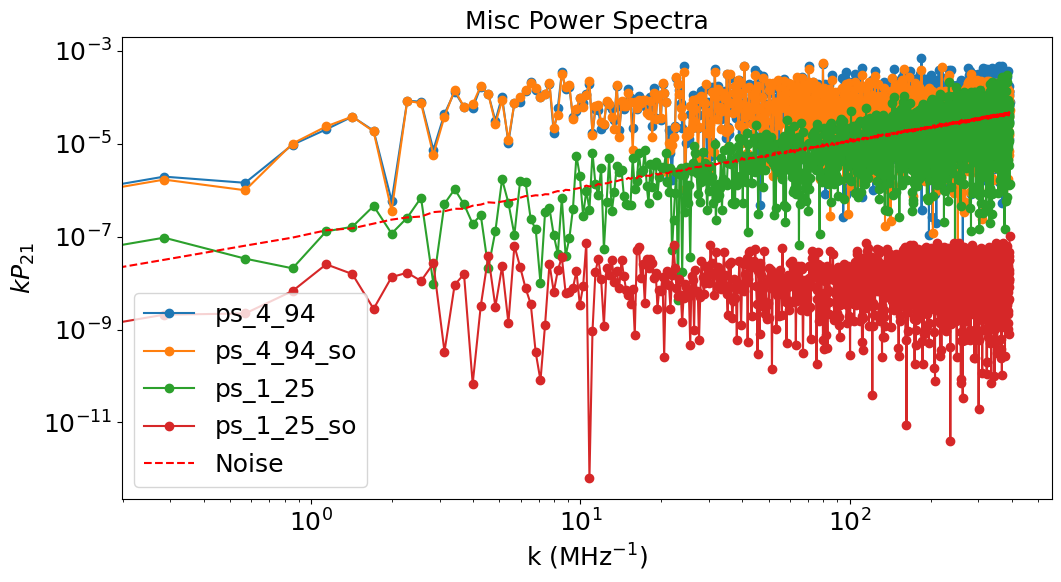

<class 'numpy.ndarray'>
Plotting: [1.00000000e-07 1.77827941e-07 3.16227766e-07 5.62341325e-07
 1.00000000e-06 1.77827941e-06 3.16227766e-06 5.62341325e-06
 1.00000000e-05 1.77827941e-05 3.16227766e-05 5.62341325e-05
 1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04], [0.00000000e+00 0.00000000e+00 1.94741549e-06 1.43393758e-06
 1.48520636e-05 3.53107868e-05 6.35191290e-05 1.07217385e-04
 9.29772770e-05 8.04459630e-05 9.16911381e-05 8.84872292e-05
 7.27105012e-05 7.50110857e-05 8.29206992e-05 0.00000000e+00]
Plotting: [1.00000000e-07 1.77827941e-07 3.16227766e-07 5.62341325e-07
 1.00000000e-06 1.77827941e-06 3.16227766e-06 5.62341325e-06
 1.00000000e-05 1.77827941e-05 3.16227766e-05 5.62341325e-05
 1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04], [0.00000000e+00 0.00000000e+00 1.68143165e-06 9.91948516e-07
 1.67233317e-05 3.49495829e-05 6.54881375e-05 1.09345450e-04
 9.51409430e-05 7.58401927e-05 8.78396412e-05 8.74703653e-05
 6.12365929e-05 5.40804511e-05 4.844

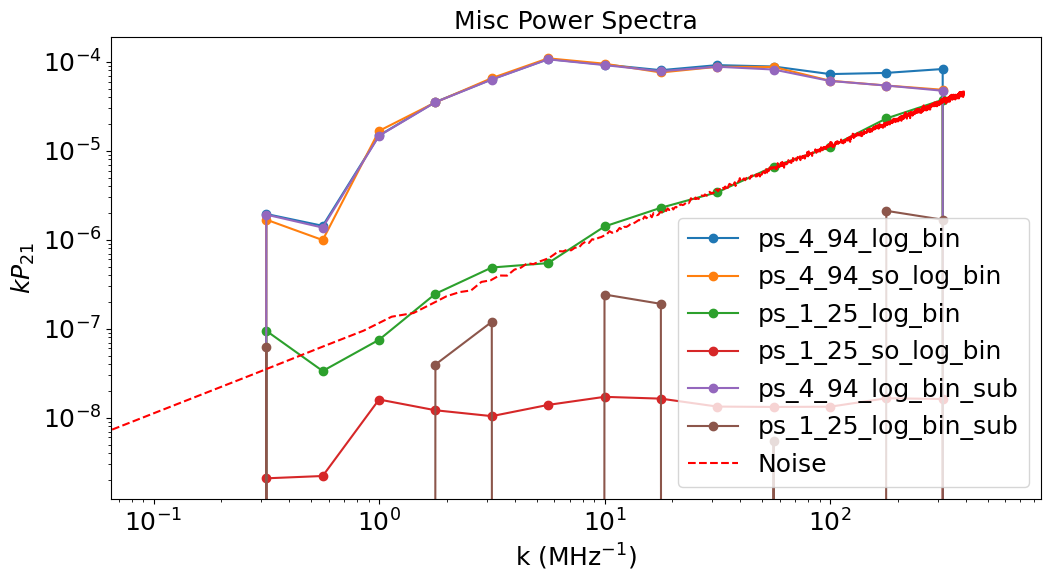

In [61]:

# main
#(params, freq, los, ps, ks) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.40_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1)
(params_4_94, freq_4_94, los_4_94, ps_4_94, ks_4_94) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10)
(params_4_94_so, freq_4_94_so, los_4_94_so, ps_4_94_so, ks_4_94_so) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_8kHz.dat"], psbatchsize=10)
ks_4_94_log_bin, ps_4_94_log_bin = f21stats.logbin_power_spectrum_by_k(ks_4_94, ps_4_94)
ks_4_94_so_log_bin, ps_4_94_so_log_bin = f21stats.logbin_power_spectrum_by_k(ks_4_94_so, ps_4_94_so)

#(params_4_25, freq_4_25, los_4_25, ps_4_25, ks_4_25) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1)
#(params_4_25_so, freq_4_25_so, los_4_25_so, ps_4_25_so, ks_4_25_so) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.25_8kHz.dat"], psbatchsize=1)
(params_1_25, freq_1_25, los_1_25, ps_1_25, ks_1_25) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=10)
ks_1_25_log_bin, ps_1_25_log_bin = f21stats.logbin_power_spectrum_by_k(ks_1_25, ps_1_25)
(params_1_25_so, freq_1_25_so, los_1_25_so, ps_1_25_so, ks_1_25_so) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_8kHz.dat"], psbatchsize=10)
ks_1_25_so_log_bin, ps_1_25_so_log_bin = f21stats.logbin_power_spectrum_by_k(ks_1_25_so, ps_1_25_so)

(paramsn, freqn, losn, psn, ksn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1000)
ksn_log_bin, psn_log_bin = f21stats.logbin_power_spectrum_by_k(ksn, psn)
ps_4_94_log_bin_sub = ps_4_94_log_bin - psn_log_bin
ps_1_25_log_bin_sub = ps_1_25_log_bin - psn_log_bin
plot(ps_set=[ps_4_94[0], ps_4_94_so[0], ps_1_25[0], ps_1_25_so[0]], ks=[ks_4_94[0], ks_4_94_so[0], ks_1_25[0], ks_1_25_so[0]], ksn=ksn, psn=psn, title='Misc Power Spectra', labels=["ps_4_94", "ps_4_94_so", "ps_1_25", "ps_1_25_so"])
plot(ps_set=[ps_4_94_log_bin[0], ps_4_94_so_log_bin[0], ps_1_25_log_bin[0], ps_1_25_so_log_bin[0], ps_4_94_log_bin_sub[0], ps_1_25_log_bin_sub[0]], ks=[ks_4_94_log_bin[0], ks_4_94_so_log_bin[0], ks_1_25_log_bin[0], ks_1_25_so_log_bin[0], ks_4_94_log_bin[0], ks_1_25_log_bin[0]], ksn=ksn, psn=psn, title='Misc Power Spectra', labels=["ps_4_94_log_bin", "ps_4_94_so_log_bin", "ps_1_25_log_bin", "ps_1_25_so_log_bin", "ps_4_94_log_bin_sub","ps_1_25_log_bin_sub"])



In [62]:
print(len([ps_4_94, ps_4_94_so]))

2
